RGB Channel

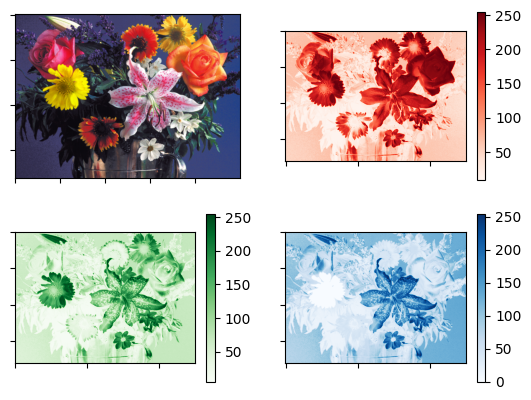

In [ ]:
import skimage.io as io
import matplotlib.pyplot as plt

# Read
img = io.imread('flowers.bmp')

# Split
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

# Plot
fig, axs = plt.subplots(2,2)

cax_00 = axs[0,0].imshow(img)
axs[0,0].xaxis.set_major_formatter(plt.NullFormatter())  # kill xlabels
axs[0,0].yaxis.set_major_formatter(plt.NullFormatter())  # kill ylabels

cax_01 = axs[0,1].imshow(red, cmap='Reds')
fig.colorbar(cax_01, ax=axs[0,1])
axs[0,1].xaxis.set_major_formatter(plt.NullFormatter())
axs[0,1].yaxis.set_major_formatter(plt.NullFormatter())

cax_10 = axs[1,0].imshow(green, cmap='Greens')
fig.colorbar(cax_10, ax=axs[1,0])
axs[1,0].xaxis.set_major_formatter(plt.NullFormatter())
axs[1,0].yaxis.set_major_formatter(plt.NullFormatter())

cax_11 = axs[1,1].imshow(blue, cmap='Blues')
fig.colorbar(cax_11, ax=axs[1,1])
axs[1,1].xaxis.set_major_formatter(plt.NullFormatter())
axs[1,1].yaxis.set_major_formatter(plt.NullFormatter())
plt.show()

HSV Channel

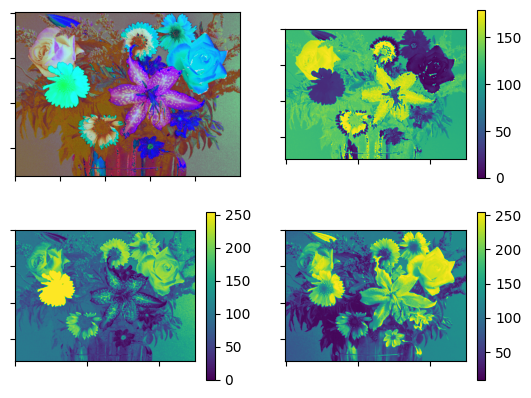

In [ ]:
import cv2
imgHSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Split
H = imgHSV[:, :, 0]
S = imgHSV[:, :, 1]
V = imgHSV[:, :, 2]

# Plot
fig, axs = plt.subplots(2,2)

cax_00 = axs[0,0].imshow(imgHSV)
axs[0,0].xaxis.set_major_formatter(plt.NullFormatter())  # kill xlabels
axs[0,0].yaxis.set_major_formatter(plt.NullFormatter())  # kill ylabels

cax_01 = axs[0,1].imshow(H)
fig.colorbar(cax_01, ax=axs[0,1])
axs[0,1].xaxis.set_major_formatter(plt.NullFormatter())
axs[0,1].yaxis.set_major_formatter(plt.NullFormatter())

cax_10 = axs[1,0].imshow(S)
fig.colorbar(cax_10, ax=axs[1,0])
axs[1,0].xaxis.set_major_formatter(plt.NullFormatter())
axs[1,0].yaxis.set_major_formatter(plt.NullFormatter())

cax_11 = axs[1,1].imshow(V)
fig.colorbar(cax_11, ax=axs[1,1])
axs[1,1].xaxis.set_major_formatter(plt.NullFormatter())
axs[1,1].yaxis.set_major_formatter(plt.NullFormatter())
plt.show()

Add Filter to image

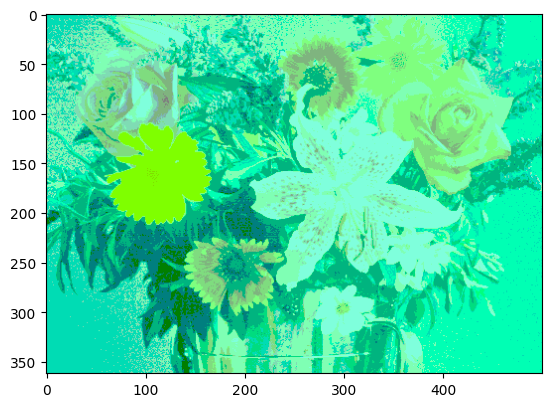

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

h,w,c = img.shape
filterimg = np.zeros((h,w,c))
filterimg[:,:,0] = 0.5*(np.sqrt(img[:,:,0]))
filterimg[:,:,1] = 0.5*(np.sqrt(img[:,:,1]))
filterimg[:,:,2] = 0.5*(np.sqrt(img[:,:,2]))

plt.imshow(filterimg)

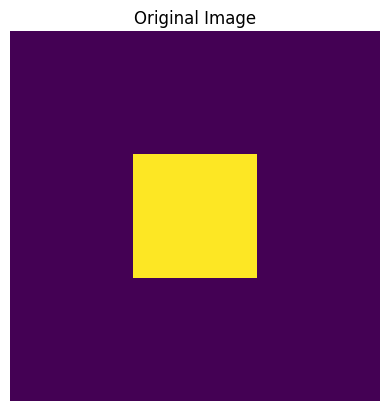

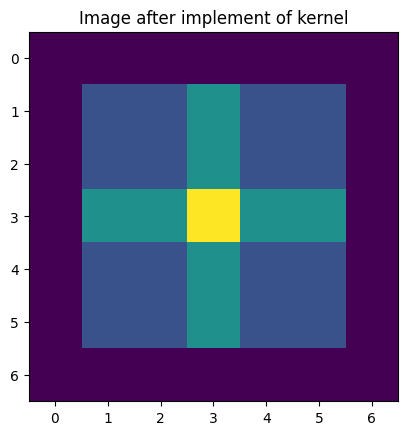

In [ ]:
# Simple convolution kernel. 
kernel = np.array( [ [1,0,1], [0,0,0], [1,0,1] ])
# Create a test image: a white square in the middle 
test_img = np.zeros((9, 9)) 
test_img[3:6, 3:6] = 1

def conv2d(img, conv_filter):
    filter_size = conv_filter.shape[1]
    result = np.zeros((img.shape))
    #Looping through the image to apply the convolution operation.
    for r in np.uint16(np.arange(filter_size/2.0, img.shape[0]-filter_size/2.0+1)):
        for c in np.uint16(np.arange(filter_size/2.0, img.shape[1]-filter_size/2.0+1)):
            curr_region = img[r-np.uint16(np.floor(filter_size/2.0)):r+np.uint16(np.ceil(filter_size/2.0)), 
                              c-np.uint16(np.floor(filter_size/2.0)):c+np.uint16(np.ceil(filter_size/2.0))]
            #Element-wise multipliplication between the current region and the filter.
            curr_result = curr_region * conv_filter
            conv_sum = np.sum(curr_result) #Summing the result of multiplication.
            result[r, c] = conv_sum #Saving the summation in the convolution layer feature map.
            
    #Clipping the outliers of the result matrix.
    final_result = result[np.uint16(filter_size/2.0):result.shape[0]-np.uint16(filter_size/2.0), 
                          np.uint16(filter_size/2.0):result.shape[1]-np.uint16(filter_size/2.0)]
    return final_result

#original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original Image")
plt.imshow(test_img)
plt.figure(2)
plt.clf()
plt.title("Image after implement of kernel")
plt.imshow(conv2d(test_img, kernel))

In [ ]:
img.shape

(300, 451)

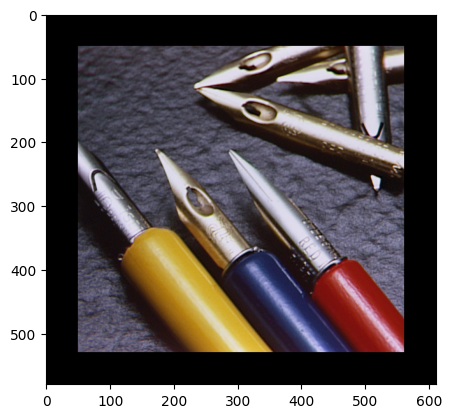

In [ ]:
from PIL import Image
image = Image.open("pens.bmp")

def zeroPad(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result

img_new = zeroPad(image, 50, 50, 50, 50, (0, 0, 0))
plt.imshow(img_new)